DATA CLEANING

In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
health_facilities = pd.read_csv("/content/drive/MyDrive/Standard Group/Health Facilities in Kenya.csv")

### Exploring the data


---




In [ ]:
health_facilities.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
health_facilities.shape

(10505, 50)

In [ ]:
health_facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            10505 non-null  int64  
 1   Facility Name            10505 non-null  object 
 2   Province                 10505 non-null  object 
 3   County                   10505 non-null  object 
 4   District                 10505 non-null  object 
 5   Division                 10238 non-null  object 
 6   Type                     10505 non-null  object 
 7   Owner                    10505 non-null  object 
 8   Location                 10010 non-null  object 
 9   Sub Location             9613 non-null   object 
 10  Description of Location  5304 non-null   object 
 11  Constituency             10505 non-null  object 
 12  Nearest Town             9903 non-null   object 
 13  Beds                     10418 non-null  float64
 14  Cots                  

In [ ]:
health_facilities.isna().sum()


Facility Code                  0
Facility Name                  0
Province                       0
County                         0
District                       0
Division                     267
Type                           0
Owner                          0
Location                     495
Sub Location                 892
Description of Location     5201
Constituency                   0
Nearest Town                 602
Beds                          87
Cots                          77
Official Landline           9138
Official Fax                9965
Official Mobile             7590
Official Email              8647
Official Address            3458
Official Alternate No       9553
Town                        2667
Post Code                   3825
In Charge                   2140
Job Title of in Charge      3099
Open 24 Hours                447
Open Weekends                457
Operational Status             0
ANC                        10505
ART                         9584
BEOC      

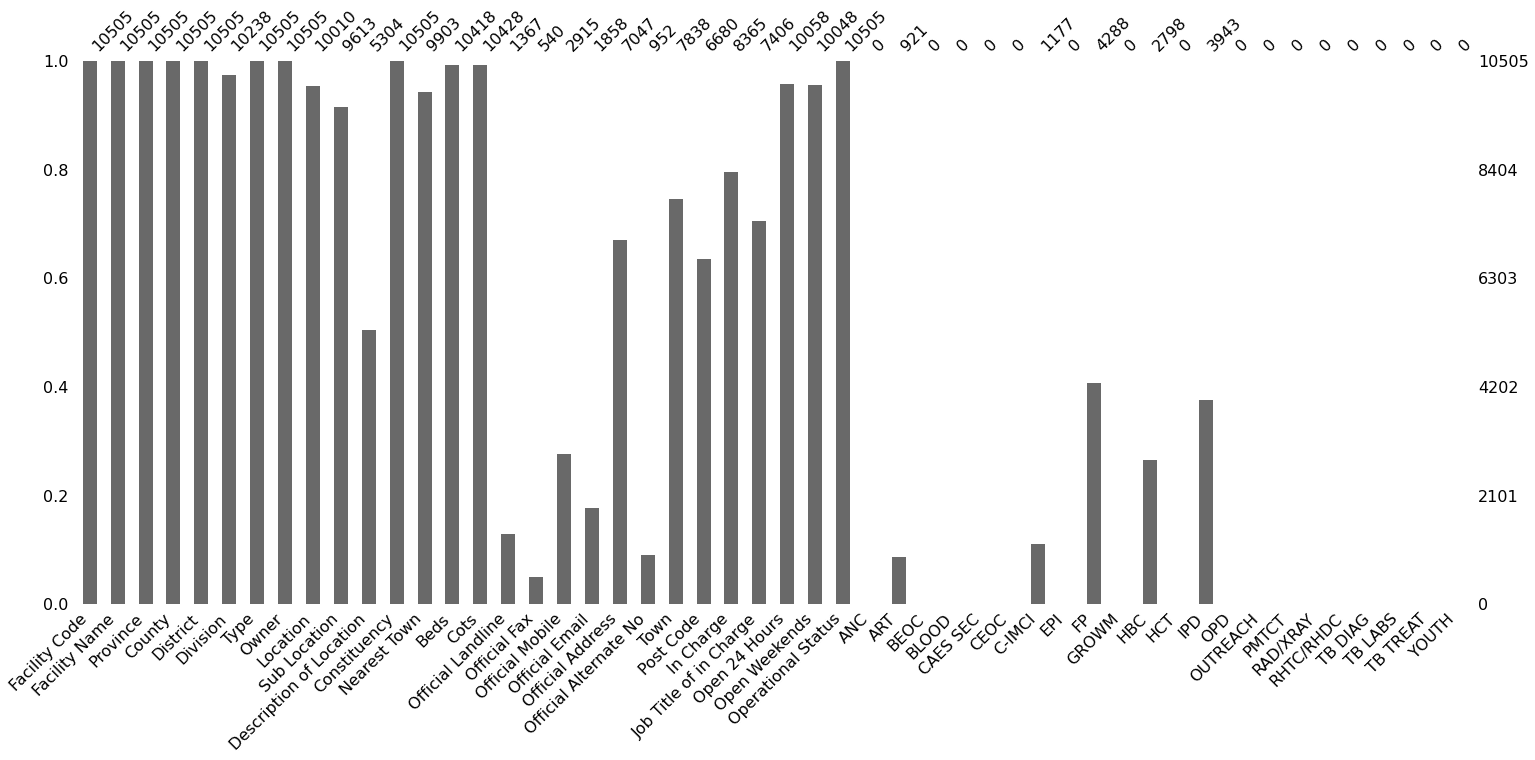

In [ ]:
msno.bar(health_facilities)

In [ ]:
# drop columns with no data
healthfacilities = health_facilities.dropna(axis=1, how='all')

In [ ]:
health_facilities.shape

(10505, 50)

In [ ]:
healthfacilities.shape

(10505, 33)

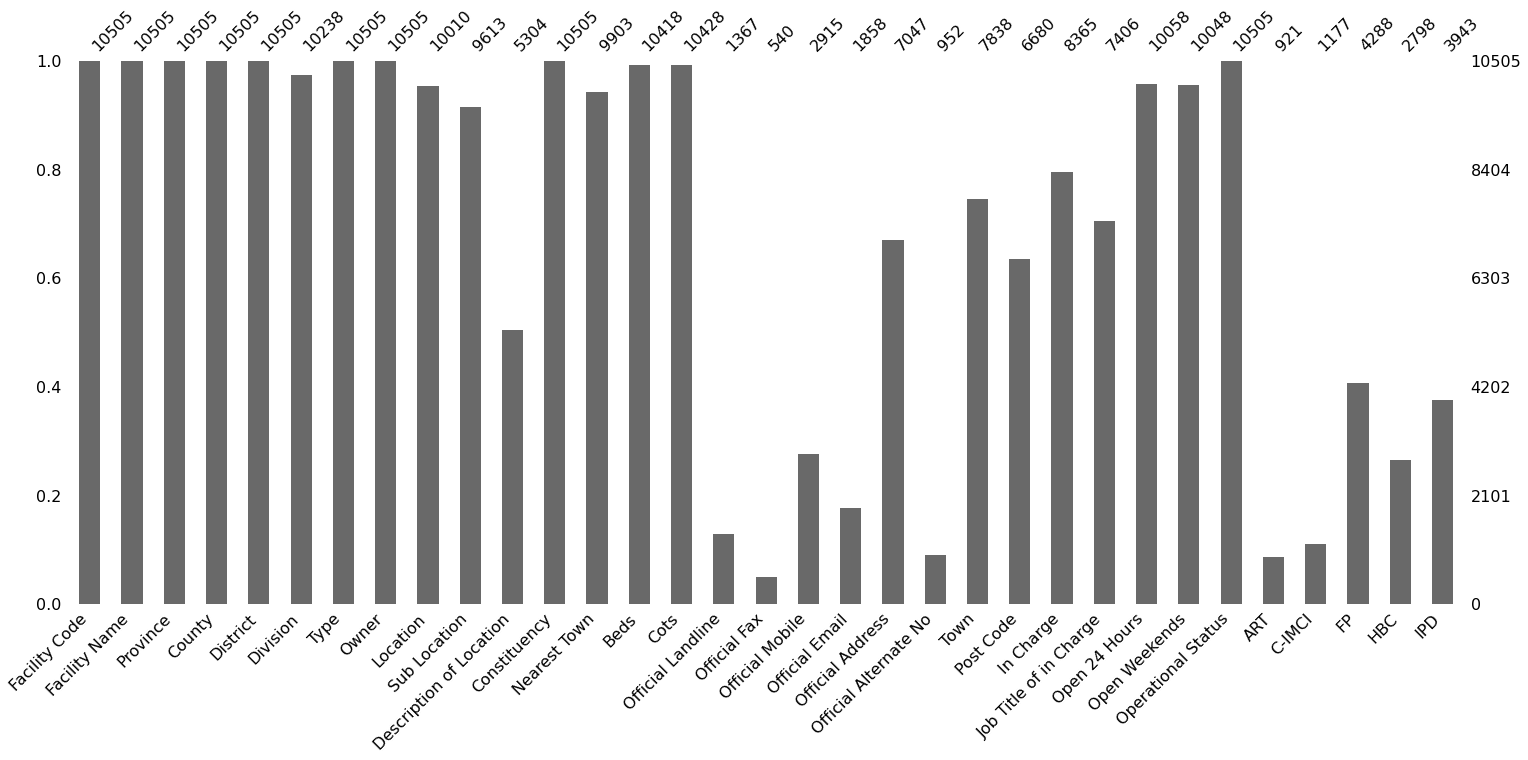

In [ ]:
msno.bar(healthfacilities)

In [ ]:
# drop the last five columns
N = 5

healthfacilities2 = healthfacilities.iloc[:, :-N]

In [ ]:
healthfacilities2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            10505 non-null  int64  
 1   Facility Name            10505 non-null  object 
 2   Province                 10505 non-null  object 
 3   County                   10505 non-null  object 
 4   District                 10505 non-null  object 
 5   Division                 10238 non-null  object 
 6   Type                     10505 non-null  object 
 7   Owner                    10505 non-null  object 
 8   Location                 10010 non-null  object 
 9   Sub Location             9613 non-null   object 
 10  Description of Location  5304 non-null   object 
 11  Constituency             10505 non-null  object 
 12  Nearest Town             9903 non-null   object 
 13  Beds                     10418 non-null  float64
 14  Cots                  

In [ ]:
# filtered_df = healthfacilities2.loc[:, healthfacilties2.columns!="Facility name"]  
# dropped these columns
filtered_df = healthfacilities2[healthfacilities2.columns.difference(['Facility Name', 'County', 'Owner'])]

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beds                     10418 non-null  float64
 1   Constituency             10505 non-null  object 
 2   Cots                     10428 non-null  float64
 3   Description of Location  5304 non-null   object 
 4   District                 10505 non-null  object 
 5   Division                 10238 non-null  object 
 6   Facility Code            10505 non-null  int64  
 7   In Charge                8365 non-null   object 
 8   Job Title of in Charge   7406 non-null   object 
 9   Location                 10010 non-null  object 
 10  Nearest Town             9903 non-null   object 
 11  Official Address         7047 non-null   object 
 12  Official Alternate No    952 non-null    float64
 13  Official Email           1858 non-null   object 
 14  Official Fax          

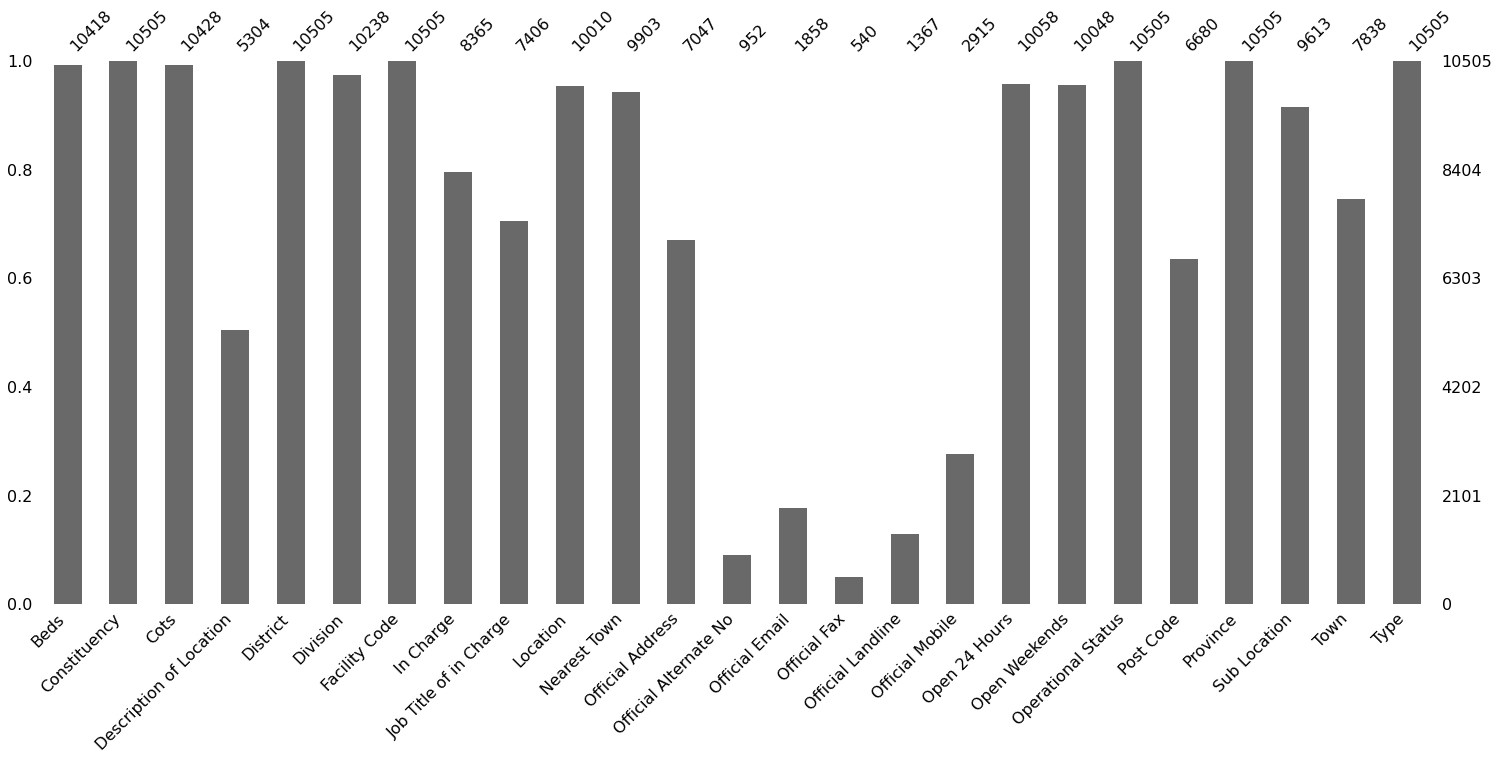

In [ ]:
msno.bar(filtered_df)

In [ ]:
# dropped all columns except these ones
filtered_df2 = healthfacilities.drop(healthfacilities.columns.difference(['Facility Name', 'County', 'Owner']), axis=1)


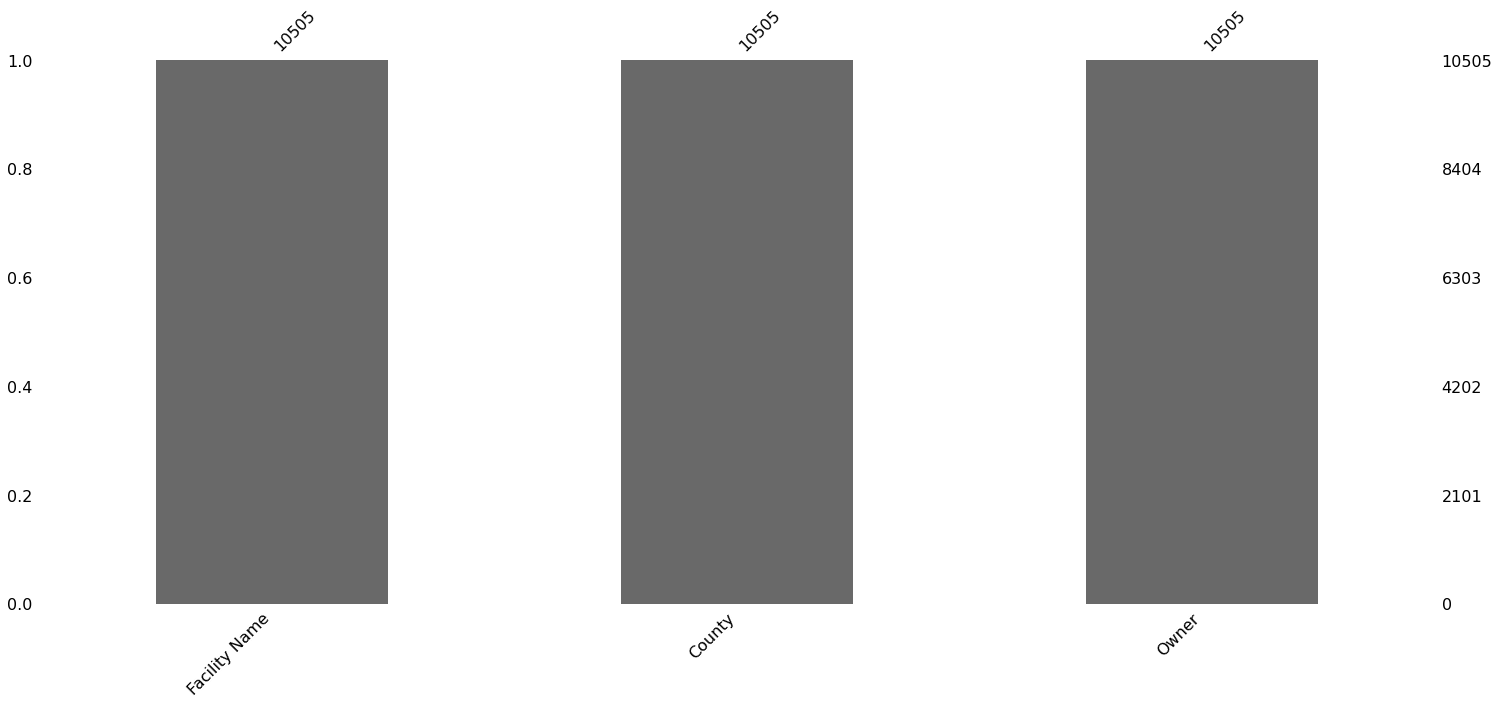

In [ ]:
msno.bar(filtered_df2)

In [ ]:
# sort values by county
filtered_df2.sort_values('County')
# healthfacilities2.sort_values('County')

,Facility Name,County,Owner
4392,Kabarnet Womens' Clinic,Baringo,Private Practice - Medical Specialist
8753,Rondonin Dispensary,Baringo,Ministry of Health
2359,Loiwat Dispensary,Baringo,Ministry of Health
6494,Aiyebo Dispensary,Baringo,Ministry of Health
8732,Riwo Dispensary,Baringo,Ministry of Health
...,...,...,...
6075,Chepnyal Dispensary,West Pokot,Other Faith Based
9769,Tamough Health Centre,West Pokot,Ministry of Health
9767,Tamkal Dispensary,West Pokot,Ministry of Health
3507,Kaptabuk Dispensary,West Pokot,Ministry of Health


### Split values into categories based on their data

Reference : [Guide to Encoding Categorical Values in Python](https://pbpython.com/categorical-encoding.html)


---





In [ ]:
filtered_df2["Owner"].value_counts()

Ministry of Health                                 4687
Private Enterprise (Institution)                   1366
Private Practice - Nurse / Midwife                 1026
Private Practice - Clinical Officer                 615
Private Practice - General Practitioner             434
Kenya Episcopal Conference-Catholic Secretariat     412
Christian Health Association of Kenya               390
Non-Governmental Organizations                      350
Other Faith Based                                   283
Private Practice - Unspecified                      242
Private Practice - Medical Specialist               169
Community                                           109
Local Authority                                     106
Company Medical Service                              86
Other Public Institution                             81
Community Development Fund                           39
Academic (if registered)                             37
Armed Forces                                    

In [ ]:
options = ['Community'] 
    
# selecting rows based on condition 
rslt_df = filtered_df2[filtered_df2['Owner'].isin(options)] 
    
print('\nResult dataframe :\n',
      rslt_df)


Result dataframe :
                       Facility Name           County      Owner
85                 Atiar Dispensary          Baringo  Community
176              Songeto Dispensary  Elgeyo Marakwet  Community
291            Tupendane Dispensary           Isiolo  Community
389                Burutu Dspensary          Kericho  Community
402             Chebirbei Dspensary          Kericho  Community
...                             ...              ...        ...
9913   Timboni Community Dispensary           Kilifi  Community
9939             Tolilet Dispensary            Nandi  Community
9996          Tsunza Medical Centre            Kwale  Community
10186       Ushirika Medical Clinic          Nairobi  Community
10349      Wapate initiative centre           Kiambu  Community

[109 rows x 3 columns]


**Custom Binary Encoding**


---



In [ ]:
public = ['Ministry of Health','Community','Local Authority',
          'Other Public Institution','Community Develpoment Fund', 
          'Armed Forces', 'Parastatal',
          'Local Authority T Fund', 'State Coorporation']

In [ ]:
# loop to run through'public' list
# public_list = [element for elemant in public if(element in public)]

In [ ]:
filtered_df2['Owner_type'] = ""

In [ ]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Facility Name  10505 non-null  object
 1   County         10505 non-null  object
 2   Owner          10505 non-null  object
 3   Owner_type     10505 non-null  object
dtypes: object(4)
memory usage: 328.4+ KB


In [ ]:
filtered_df2.head(5)

,Facility Name,County,Owner,Owner_type
0,CDF Kiriari Dispensary,Embu,Ministry of Health,
1,St Jude's Huruma Community Health Services,Nairobi,Private Practice - Unspecified,
2,10 Engineer VCT,Laikipia,Armed Forces,
3,12 Engineers,Kiambu,Ministry of Health,
4,3Kl Maternity & Nursing Home,Kajiado,Private Practice - Clinical Officer,


In [ ]:
filtered_df2['Owner Type'] = np.where(filtered_df2["Owner"].str.contains('|'.join(public)),1,0)

In [ ]:
filtered_df2.head(5)

,Facility Name,County,Owner,Owner_type,Owner Type
0,CDF Kiriari Dispensary,Embu,Ministry of Health,,1
1,St Jude's Huruma Community Health Services,Nairobi,Private Practice - Unspecified,,0
2,10 Engineer VCT,Laikipia,Armed Forces,,1
3,12 Engineers,Kiambu,Ministry of Health,,1
4,3Kl Maternity & Nursing Home,Kajiado,Private Practice - Clinical Officer,,0


In [ ]:
filtered_df2.drop('Owner_type', inplace=True, axis=1)

In [ ]:
filtered_df2.head(5)


,Facility Name,County,Owner,Owner Type
0,CDF Kiriari Dispensary,Embu,Ministry of Health,1
1,St Jude's Huruma Community Health Services,Nairobi,Private Practice - Unspecified,0
2,10 Engineer VCT,Laikipia,Armed Forces,1
3,12 Engineers,Kiambu,Ministry of Health,1
4,3Kl Maternity & Nursing Home,Kajiado,Private Practice - Clinical Officer,0


In [ ]:
options = ['Nairobi'] 
    
# selecting rows based on condition 
result_df = filtered_df2[filtered_df2['County'].isin(options)] 
    
print('\nResult dataframe :\n',
      result_df)


Result dataframe :
                                      Facility Name   County  \
1       St Jude's Huruma Community Health Services  Nairobi   
7                            7Kr Mrs Health Centre  Nairobi   
10                         AAR Adams Health Centre  Nairobi   
11                          AAR City Centre Clinic  Nairobi   
12             AAR Clinic Sarit Centre (Westlands)  Nairobi   
...                                            ...      ...   
10459                      Woodstreet Nursing Home  Nairobi   
10493                   Zimerbreeze Medical Centre  Nairobi   
10494                            Zimma Health Care  Nairobi   
10495                 Zimmerman Medical Dispensary  Nairobi   
10496                               Zinduka Clinic  Nairobi   

                                         Owner  Owner Type  
1               Private Practice - Unspecified           0  
7                                 Armed Forces           1  
10     Private Practice - General Pract

In [ ]:
# # filtered dataframe
# def filter_values(county_name, owner_type):
#   filtered_values = np.where((filtered_df2['County']==county_name) & (filtered_df2['Owner Type']==owner_type))
#   return filtered_values

In [ ]:
filtered_df2.sort_values(
    by=["County", "Owner Type"]
)[["County", "Owner Type"]]

,County,Owner Type
56,Baringo,0
994,Baringo,0
1260,Baringo,0
1833,Baringo,0
2286,Baringo,0
...,...,...
9904,West Pokot,1
10063,West Pokot,1
10301,West Pokot,1
10420,West Pokot,1


In [ ]:
county_group = filtered_df2.groupby('County')

In [ ]:
county_group.get_group('Nairobi')

,Facility Name,County,Owner,Owner Type
1,St Jude's Huruma Community Health Services,Nairobi,Private Practice - Unspecified,0
7,7Kr Mrs Health Centre,Nairobi,Armed Forces,1
10,AAR Adams Health Centre,Nairobi,Private Practice - General Practitioner,0
11,AAR City Centre Clinic,Nairobi,Private Enterprise (Institution),0
12,AAR Clinic Sarit Centre (Westlands),Nairobi,Private Enterprise (Institution),0
...,...,...,...,...
10459,Woodstreet Nursing Home,Nairobi,Private Enterprise (Institution),0
10493,Zimerbreeze Medical Centre,Nairobi,Private Practice - General Practitioner,0
10494,Zimma Health Care,Nairobi,Private Practice - General Practitioner,0
10495,Zimmerman Medical Dispensary,Nairobi,Private Enterprise (Institution),0


In [ ]:
# grouped_df2 = filtered_df2.groupby(['County','Owner Type'])


In [ ]:
# grouped_df2.first()

In [ ]:
# print(county_group.get_group('Nairobi').count())

In [ ]:
# print(county_group.get_group('Nairobi').value_counts())


In [ ]:
filtered_df2.sort_values(
    by=["County", "Owner Type"]
)[["County", "Owner Type"]]

,County,Owner Type
56,Baringo,0
994,Baringo,0
1260,Baringo,0
1833,Baringo,0
2286,Baringo,0
...,...,...
9904,West Pokot,1
10063,West Pokot,1
10301,West Pokot,1
10420,West Pokot,1


In [ ]:
owner_type_count = county_group["Owner Type"].value_counts()

In [ ]:
type(owner_type_count)

pandas.core.series.Series

In [ ]:
owner_type_count_df = pd.DataFrame([owner_type_count])
print(owner_type_count_df)

County     Baringo     Bomet     Bungoma     Busia     Elgeyo Marakwet      \
Owner Type       1   0     1   0       1   0     1   0               1   0   
Owner Type     205  32   123  20     107  78    83  35             115  18   

County      ... Turkana     Uasin Gishu     Vihiga     Wajir     West Pokot  \
Owner Type  ...       1   0           1   0      0   1     1   0          1   
Owner Type  ...     104  67         106  88     51  46   107  51         93   

County          
Owner Type   0  
Owner Type  39  

[1 rows x 94 columns]


In [ ]:
owner_type_count_df

County     Baringo     Bomet     Bungoma     Busia     Elgeyo Marakwet      \
Owner Type       1   0     1   0       1   0     1   0               1   0   
Owner Type     205  32   123  20     107  78    83  35             115  18   

County      ... Turkana     Uasin Gishu     Vihiga     Wajir     West Pokot  \
Owner Type  ...       1   0           1   0      0   1     1   0          1   
Owner Type  ...     104  67         106  88     51  46   107  51         93   

County          
Owner Type   0  
Owner Type  39  

[1 rows x 94 columns]

In [ ]:
ownerType_df = owner_type_count_df.transpose()
print(ownerType_df)

                       Owner Type
County     Owner Type            
Baringo    1                  205
           0                   32
Bomet      1                  123
           0                   20
Bungoma    1                  107
...                           ...
Vihiga     1                   46
Wajir      1                  107
           0                   51
West Pokot 1                   93
           0                   39

[94 rows x 1 columns]


In [ ]:
ownerType_df.to_csv('OwnerType.csv')

In [ ]:
list(county_group.groups.keys())

['Baringo',
 'Bomet',
 'Bungoma',
 'Busia',
 'Elgeyo Marakwet',
 'Embu',
 'Garissa',
 'Homa Bay',
 'Isiolo',
 'Kajiado',
 'Kakamega',
 'Kericho',
 'Kiambu',
 'Kilifi',
 'Kirinyaga',
 'Kisii',
 'Kisumu',
 'Kitui',
 'Kwale',
 'Laikipia',
 'Lamu',
 'Machakos',
 'Makueni',
 'Mandera',
 'Marsabit',
 'Meru',
 'Migori',
 'Mombasa',
 "Murang'a",
 'Nairobi',
 'Nakuru',
 'Nandi',
 'Narok',
 'Nyamira',
 'Nyandarua',
 'Nyeri',
 'Samburu',
 'Siaya',
 'Taita Taveta',
 'Tana River',
 'Tharaka Nithi',
 'Trans Nzoia',
 'Turkana',
 'Uasin Gishu',
 'Vihiga',
 'Wajir',
 'West Pokot']

In [ ]:
print(county_group.groups)

{'Baringo': [56, 85, 151, 162, 182, 184, 285, 398, 805, 824, 850, 851, 855, 857, 860, 863, 866, 867, 869, 870, 972, 994, 1005, 1010, 1047, 1260, 1261, 1278, 1475, 1504, 1517, 1624, 1667, 1668, 1688, 1752, 1759, 1768, 1776, 1782, 1827, 1833, 1840, 1947, 1991, 2003, 2085, 2098, 2106, 2149, 2160, 2172, 2173, 2177, 2208, 2214, 2271, 2286, 2305, 2306, 2338, 2347, 2359, 2392, 2478, 2692, 2929, 2947, 2948, 2949, 2952, 2962, 2967, 2980, 2981, 2982, 3003, 3133, 3280, 3284, 3293, 3298, 3351, 3410, 3411, 3415, 3434, 3435, 3438, 3445, 3456, 3538, 3594, 3614, 3680, 3706, 3849, 3861, 3981, 3999, ...], 'Bomet': [168, 199, 201, 202, 280, 374, 400, 403, 404, 405, 411, 415, 416, 639, 830, 838, 843, 848, 886, 889, 982, 983, 1001, 1006, 1008, 1014, 1016, 1170, 1205, 1481, 1532, 1872, 1998, 2089, 2102, 2108, 2168, 2169, 2213, 2218, 2232, 2234, 2257, 2317, 2371, 2432, 2680, 2727, 2843, 2940, 2943, 2998, 3034, 3307, 3347, 3353, 3354, 3441, 3452, 3453, 3454, 3455, 3461, 3473, 3481, 3486, 3487, 3965, 3978, 399

In [ ]:
for county, group in county_group:
  print(county)
  print(group)

Baringo
                         Facility Name   County  \
56     Alpha Medical Clinic (Koibatek)  Baringo   
85                    Atiar Dispensary  Baringo   
151                   Sogon Dispensary  Baringo   
162                  Solian Dispensary  Baringo   
182                    Sore Dispensary  Baringo   
...                                ...      ...   
9957                Topulen dispensary  Baringo   
9961             Torongo Health Centre  Baringo   
10003               Tugumoi Dispensary  Baringo   
10006              Tuiyobei Dispensary  Baringo   
10364               Waseges Dispensary  Baringo   

                                    Owner  Owner Type  
56     Private Practice - Nurse / Midwife           0  
85                              Community           1  
151                    Ministry of Health           1  
162                    Ministry of Health           1  
182                    Ministry of Health           1  
...                                   ...  

## Working on the actual data


---





In [ ]:
# # read google sheet
# sheet_url = "https://docs.google.com/spreadsheets/d/1GFi0eevr3dTax1YL2jRGZvH8BSePUcZnapKGZ2UJpnY/edit#gid=0"
# url = sheet_url.replace('/edit#gid=’, ‘/export?format=csv&gid=’)

In [ ]:
# kenya_health_facilities = pd.read_csv(url)

In [ ]:
kenya_health_facilities = pd.read_csv('/content/Kenya Health Facilities - Sheet1.csv')


FileNotFoundError: ignored

In [ ]:
kenya_health_facilities.head()

Reference : [Removing Duplicate values](https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f)

In [ ]:
kenya_health_facilities['County'] = kenya_health_facilities['County'].str.capitalize()
kenya_health_facilities['Name'] = kenya_health_facilities['Name'].str.capitalize()

In [ ]:
# check duplicate values
kenya_health_facilities['Name'].duplicated().sum()

In [ ]:
# duplicate = kenya_health_facilities[kenya_health_facilities.duplicated(subset=['Name', 'County'])]
# duplicate

In [ ]:
kenya_health_facilities.info()

In [ ]:
msno.bar(kenya_health_facilities)

In [ ]:
kenya_health_dropped = kenya_health_facilities.drop(kenya_health_facilities.columns.difference(['County', 'Owner']), axis=1)


In [ ]:
kenya_health_dropped.info()

In [ ]:
kenya_health_dropped["Owner"].value_counts()


In [ ]:
public = ['Ministry of Health','Community','Local Authority',
          'Other Public Institution','Public Institution - Academic','Academic (if registered)',
          'Community Develpoment Fund', 'Public Institution - Parastatal', 
          'Armed Forces', 'Parastatal', 'Local Authority T Fund', 'State Coorporation']

In [ ]:
kenya_health_dropped['Owner Type'] = np.where(kenya_health_dropped["Owner"].str.contains('|'.join(public)),1,0)


In [ ]:
kenya_health_dropped.head()

In [ ]:
type(kenya_health_dropped)

In [ ]:
kenya_health_dropped.columns

In [ ]:
# kenya_health_new = kenya_health_dropped['County'].str.capitalize()

In [ ]:
# kenya_health_new


In [ ]:
kenya_health_county_group = kenya_health_dropped.groupby('County')

In [ ]:
kenya_health_county_group.get_group('Mombasa')

In [ ]:
kenya_health_owner_type= kenya_health_county_group["Owner Type"].value_counts()


In [ ]:
type(kenya_health_owner_type)

In [ ]:
kenya_health_owner_type = pd.DataFrame([kenya_health_owner_type])
print(kenya_health_owner_type)

In [ ]:
kenya_health_owner_type

In [ ]:
KenyaHealthFacilities_OwnerType = kenya_health_owner_type.transpose()
print(KenyaHealthFacilities_OwnerType)

In [ ]:
KenyaHealthFacilities_OwnerType.to_csv('KenyaHealthFacilities_OwnerType.csv')

In [ ]:
options = ['Supreme Council for Kenya Muslims'] 
    
# selecting rows based on condition 
rslt_df = kenya_health_dropped[kenya_health_dropped['Owner'].isin(options)] 
    
print('\nResult dataframe :\n',
      rslt_df)

In [ ]:
type(result_df)

In [ ]:
options = ['Mombasa'] 
    
# selecting rows based on condition 
result_df = kenya_health_dropped[kenya_health_dropped['County'].isin(options)] 
    
print('\nResult dataframe :\n',
      result_df)

In [ ]:
options = ['Elgeyo marakwet','Elegeyo-marakwet'] 
    
# selecting rows based on condition 
result_df = kenya_health_dropped[kenya_health_dropped['County'].isin(options)] 
    
print('\nResult dataframe :\n',
      result_df)